In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pickle
import pandas as pd
import ROOT
import numpy as np
from numpy import mean
from math import sqrt,acos,cos,sin,pi,exp,log,isnan,atan2
from numpy import asarray
from root_pandas import read_root
from matplotlib import gridspec
from scipy import stats
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from textwrap import wrap
import seaborn as sns

import os

from PlottingScripts import CV, Spline, Tune1, distVar, distplot_wratio, distplot_wratio_dvar, StackedHisto, SimpleHisto, mcplot, Pi0Wgt, dist2d_statsonly, Cov,DrawMatrix

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

Welcome to JupyROOT 6.18/04


In [2]:
datafolder = '/home/dcianci/Physics/1e1p/data'

## Set scalings

In [3]:
#wc tagger
#NUMU_RUN1_POT = 4.71579e+20 #in full sample
NUMU_RUN1_POT = 4.71579e+20-1.76704330551e+20  # not in training sample
#NUMU_LOWE_RUN1_POT = 1.63103516179e+21 # in full sample
NUMU_LOWE_RUN1_POT = 1.63103516179e+21-6.63688818656e+20 # not in training sample
NUE_RUN1_POT  = 9.80259e+22
RUN1_POT = 4.403e+19
EXTRUN1_POT = (22474918.0) / float ( 9776965.0) * RUN1_POT# * RUN1_NUMU_LOWE_TS
DIRT_RUN1_POT = 2.61947e+20

NUMU_RUN2_POT = 4.08963968669e+20
NUE_RUN2_POT = 9.2085012316e+22

#NUMU_RUN3_POT = 8.98773223801e+20 # in full sample
NUMU_RUN3_POT = 8.98773223801e+20-3.88480441949e+20# not in training
NUMU_LOWE_RUN3_POT = 1.51234621011e+21  # in full sample
#NUMU_LOWE_RUN3_POT = 1.1292236220503151e+21  # not in training
NUE_RUN3_POT = 4.70704675581e+22
RUN3_POT = 8.786e+18 # no beam quality  cut
EXTRUN3_POT = (39566274.0) / float (2263559) * RUN3_POT# * 0.6954257246376812

RUN1_FILTER_POT = 1.558e+20 + 1.129e+17 + 1.869e+19   # C1
RUN2_FILTER_POT = (1.63e+20 + 2.964e+19 + 1.239e+19) + (5.923e+19) # D2 + E1
RUN3_FILTER_POT = (1.701e+20 + 2.97e+19 + 1.524e+17) + (4.3e+19)    # G1 + F1
POT_SCALE_FACTOR = RUN1_POT

NUMU_RUN1_SCALE = POT_SCALE_FACTOR / float(NUMU_RUN1_POT)
NUMU_LOWE_RUN1_SCALE = POT_SCALE_FACTOR / float(NUMU_LOWE_RUN1_POT)
NUMU_RUN2_SCALE = POT_SCALE_FACTOR / float(NUMU_RUN2_POT)
NUMU_RUN3_SCALE = POT_SCALE_FACTOR / float(NUMU_RUN3_POT)
NUMU_LOWE_RUN3_SCALE = POT_SCALE_FACTOR / float(NUMU_LOWE_RUN3_POT)
NUE_RUN1_SCALE = POT_SCALE_FACTOR / float(NUE_RUN1_POT)
NUE_RUN2_SCALE = POT_SCALE_FACTOR / float(NUE_RUN2_POT)
NUE_RUN3_SCALE = POT_SCALE_FACTOR / float(NUE_RUN3_POT)
EXT_RUN1_SCALE = POT_SCALE_FACTOR / float(EXTRUN1_POT)
EXT_RUN3_SCALE = POT_SCALE_FACTOR / float(EXTRUN3_POT)
DIRT_RUN1_SCALE = POT_SCALE_FACTOR / float(DIRT_RUN1_POT)

RUN1_SCALE = POT_SCALE_FACTOR / float(RUN1_POT)
RUN3_SCALE = POT_SCALE_FACTOR / float(RUN3_POT)

RUN3_FT_SCALE = POT_SCALE_FACTOR / float(RUN3_FILTER_POT)
RUN2_FT_SCALE = POT_SCALE_FACTOR/float(RUN2_FILTER_POT)
RUN1_FT_SCALE = POT_SCALE_FACTOR/float(RUN1_FILTER_POT)

## Load up parquets with our samples (w/ applied precuts)
note that one can load from different tags --- not every update affected every sample

In [4]:
tag = 'Feb10_pi0wgt'

df_numu_run1_presel = pd.read_parquet('%s/pickles/numu_run1_%s.parquet'%(datafolder,tag)).query('InTraining == 0')

df_numu_run3_presel= pd.read_parquet('%s/pickles/numu_run3_%s.parquet'%(datafolder,tag)).query('InTraining == 0')
df_numu_run2_presel= pd.read_parquet('%s/pickles/numu_run2_%s.parquet'%(datafolder,tag))

df_nue_run1_presel = pd.read_parquet('%s/pickles/nue_run1_%s.parquet'%(datafolder,tag))
df_nue_run3_presel = pd.read_parquet('%s/pickles/nue_run3_%s.parquet'%(datafolder,tag))
df_nue_run2_presel = pd.read_parquet('%s/pickles/nue_run2_%s.parquet'%(datafolder,tag))


tag = 'Nov17_tune2'

df_numu_run1_lowe_presel = pd.read_parquet('%s/pickles/numu_lowe_run1_%s.parquet'%(datafolder,tag))#.query('InTraining == 0')

df_ext_run1_presel = pd.read_parquet('%s/pickles/ext_run1_%s.parquet'%(datafolder,tag))
df_ext_run3_presel = pd.read_parquet('%s/pickles/ext_run3_%s.parquet'%(datafolder,tag))

df_fakedata_set4_run1_presel = pd.read_parquet('%s/pickles/fakedata_set4_run1_%s.parquet'%(datafolder,tag))
df_fakedata_set4_run3b_presel = pd.read_parquet('%s/pickles/fakedata_set4_run3b_%s.parquet'%(datafolder,tag))
df_fakedata_set5_run1_presel = pd.read_parquet('%s/pickles/fakedata_set5_run1_%s.parquet'%(datafolder,tag))
df_data_run1_presel = pd.read_parquet('%s/pickles/data_run1_5e19_beamqualitytag_%s.parquet'%(datafolder,tag))

tag = 'Aug10_fullyloaded'

#df_data_run1_presel = pd.read_parquet('%s/pickles/data_run1_5e19_%s.parquet'%(datafolder,tag))
df_data_run3_presel = pd.read_parquet('%s/pickles/data_run3_1e19_%s.parquet'%(datafolder,tag))
df_data_run1_filter_presel = pd.read_parquet('%s/pickles/data_run1_filter_%s.parquet'%(datafolder,tag))
df_data_run2_filter_presel = pd.read_parquet('%s/pickles/data_run2_filter_%s.parquet'%(datafolder,tag))
df_data_run3_filter_presel = pd.read_parquet('%s/pickles/data_run3_filter_%s.parquet'%(datafolder,tag))

df_fakedata_set1_run1_presel = pd.read_parquet('%s/pickles/fakedata_set1_run1_%s.parquet'%(datafolder,tag))
df_fakedata_set1_run3b_presel = pd.read_parquet('%s/pickles/fakedata_set1_run3b_%s.parquet'%(datafolder,tag))
df_fakedata_set2_run1_presel = pd.read_parquet('%s/pickles/fakedata_set2_run1_%s.parquet'%(datafolder,tag))
df_fakedata_set2_run3b_presel = pd.read_parquet('%s/pickles/fakedata_set2_run3b_%s.parquet'%(datafolder,tag))
df_fakedata_set3_run1_presel = pd.read_parquet('%s/pickles/fakedata_set3_run1_%s.parquet'%(datafolder,tag))
df_fakedata_set3_run3b_presel = pd.read_parquet('%s/pickles/fakedata_set3_run3b_%s.parquet'%(datafolder,tag))

In [5]:
#Make big list of variables with their accompanying ranges so we can just dump a buttload of plots
covfolder = 'CovMatrices_Feb9_2021'
covtag = 'frac_covar_sel_total_withPi0Weights'
varListSel = {}

varListSel['Xreco'] = distVar('Xreco',(15,241.25),'Reco Vertex X',datafolder+'/'+covfolder+'/'+covtag+'__x_reco.txt')
varListSel['Yreco'] = distVar('Yreco',(-101.5,101.5),'Reco Vertex Y',datafolder+'/'+covfolder+'/'+covtag+'__y_reco.txt')
varListSel['Zreco'] = distVar('Zreco',(15,1021.8),'Reco Vertex Z',datafolder+'/'+covfolder+'/'+covtag+'__z_reco.txt')
varListSel['OpenAng'] = distVar('OpenAng',(.6,2.8),'Opening Angle (rads)',datafolder+'/'+covfolder+'/'+covtag+'__openang_reco.txt')
varListSel['Thetas'] = distVar('Thetas',(0,np.pi),r'Sum of Thetas ($\theta_{p} + \theta_{\mu}$) (rads)',datafolder+'/'+covfolder+'/'+covtag+'__sum_thetas_reco.txt')
varListSel['Phis'] = distVar('Phis',(1.5,4),r'Difference of Phis ($|\phi_{p} - \phi_{\mu}|$)  (rads)',datafolder+'/'+covfolder+'/'+covtag+'__sum_phis_reco.txt')
varListSel['ChargeNearTrunk'] = distVar('ChargeNearTrunk',(0,600),'ADC Charge within 5cm of Reco Vertex',datafolder+'/'+covfolder+'/'+covtag+'__charge_near_trunk_reco.txt')
varListSel['Enu_1m1p'] = distVar('Enu_1m1p',(200,1200),'Reconstructed Neutrino Energy (MeV)',datafolder+'/'+covfolder+'/'+covtag+'__nu_energy_reco.txt')
varListSel['PhiT_1m1p'] = distVar('PhiT_1m1p',(0,1),r'$\phi_T$',datafolder+'/'+covfolder+'/'+covtag+'__phiT_reco.txt')
varListSel['AlphaT_1m1p'] = distVar('AlphaT_1m1p',(0,np.pi),r'$\alpha_T$',datafolder+'/'+covfolder+'/'+covtag+'__alphaT_reco.txt')
varListSel['PT_1m1p'] = distVar('PT_1m1p',(0,320),r'$p_T$',datafolder+'/'+covfolder+'/'+covtag+'__pT_reco.txt')
varListSel['PTRat_1m1p'] = distVar('PTRat_1m1p',(0,.4),r'$p_T/|p|$',datafolder+'/'+covfolder+'/'+covtag+'__pT_ratio_reco.txt')
varListSel['BjXB_1m1p'] = distVar('BjXB_1m1p',(.2,1.8),'Bjorken X*',datafolder+'/'+covfolder+'/'+covtag+'__BjxB_reco.txt')
varListSel['BjYB_1m1p'] = distVar('BjYB_1m1p',(0.05,.75),'Bjorken Y*',datafolder+'/'+covfolder+'/'+covtag+'__BjyB_reco.txt')
varListSel['Q2_1m1p'] = distVar('Q2_1m1p',(0,6e5),r'$Q^2$',datafolder+'/'+covfolder+'/'+covtag+'__Q2_reco.txt')
varListSel['SphB_1m1p'] = distVar('SphB_1m1p',(0,1000),'QE Consistency*',datafolder+'/'+covfolder+'/'+covtag+'__sphB_reco.txt')
varListSel['Q0_1m1p'] = distVar('Q0_1m1p',(70,600),r'$Q_0$',datafolder+'/'+covfolder+'/'+covtag+'__Q0_reco.txt')
varListSel['Q3_1m1p'] = distVar('Q3_1m1p',(200,1000),r'$Q_3$',datafolder+'/'+covfolder+'/'+covtag+'__Q3_reco.txt')
varListSel['Lepton_PhiReco'] = distVar('Lepton_PhiReco',(-np.pi,np.pi),r'Muon $\phi$',datafolder+'/'+covfolder+'/'+covtag+'__lepton_phi_reco.txt')
varListSel['Lepton_ThetaReco'] = distVar('Lepton_ThetaReco',(.2,2.8),r'Muon $\theta$',datafolder+'/'+covfolder+'/'+covtag+'__lepton_theta_reco.txt')
varListSel['Lepton_TrackLength'] = distVar('Lepton_TrackLength',(20,200),'Muon Track Length (cm)',datafolder+'/'+covfolder+'/'+covtag+'__lepton_length_reco.txt')
varListSel['Muon_Edep'] = distVar('Muon_Edep',(50,1500),'Reco Muon Energy (from range) (MeV)',datafolder+'/'+covfolder+'/'+covtag+'__lepton_KE_reco.txt')
varListSel['Proton_PhiReco'] = distVar('Proton_PhiReco',(-np.pi,np.pi),r'Proton $\phi$',datafolder+'/'+covfolder+'/'+covtag+'__proton_phi_reco.txt')
varListSel['Proton_ThetaReco'] = distVar('Proton_ThetaReco',(0,2),r'Proton $\theta$',datafolder+'/'+covfolder+'/'+covtag+'__proton_theta_reco.txt')
varListSel['Proton_TrackLength'] = distVar('Proton_TrackLength',(5,100),'Proton Track Length',datafolder+'/'+covfolder+'/'+covtag+'__proton_length_reco.txt')
varListSel['Proton_Edep'] = distVar('Proton_Edep',(50,500),'Reco Proton Energy (from range) (MeV)',datafolder+'/'+covfolder+'/'+covtag+'__proton_KE_reco.txt')
varListSel['Proton_CosTheta'] = distVar('Proton_CosTheta',(0,1),'Proton Cos Theta',datafolder+'/'+covfolder+'/'+covtag+'__proton_cos_theta_reco.txt')
varListSel['Lepton_CosTheta'] = distVar('Lepton_CosTheta',(-1,1),'Muon Cos Theta',datafolder+'/'+covfolder+'/'+covtag+'__lepton_cos_theta_reco.txt')
varListSel['MPID_eminus'] = distVar('MPID_eminus',(0,1),'Eminus MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_eminus_score.txt')
varListSel['MPID_muon'] = distVar('MPID_muon',(0,1),'Muon MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_muon_score.txt')
varListSel['MPID_proton'] = distVar('MPID_proton',(0,1),'Proton MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_proton_score.txt')
varListSel['MPID_gamma'] = distVar('MPID_gamma',(0,1),'Gamma MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_gamma_score.txt')
varListSel['MPID_pion'] = distVar('MPID_pion',(0,1),'Pion MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_pion_score.txt')
varListSel['bkgBDT_univ'] = distVar('bkgBDT_univ',(0,.4),'BDT Score',datafolder+'/'+covfolder+'/'+covtag+'__bdt_score.txt')

In [6]:
varListSel['Enu_1m1p'].myscov

'/home/dcianci/Physics/1e1p/data/CovMatrices_Feb9_2021/frac_covar_sel_total_withPi0Weights__nu_energy_reco.txt'

In [11]:
bdtcuts = 'bkgBDT_univ < .4'
emptycut = 'Enu_1m1p > 0'
morecuts = 'Proton_CosTheta > 0'
bonuscuts = '(MPID_proton > .9 or Enu_1m1p > 400)'

#s_cuts = morecuts + ' and ' + bonuscuts + ' and ' + bdtcuts+ ' and not (InTraining==1)'#not (80 < Xreco < 92)'
s_cuts = morecuts + ' and ' + bonuscuts + ' and ' + bdtcuts

# print ntuples for an oscillation study
#df_data_run1_presel.query(s_cuts)[printvars].to_csv('~/Downloads/dataSelected_RSEVE_run1_5e19_%s.csv'%tag,index=False,header=False)
df_numu_run1_presel['potscale'] = RUN1_FILTER_POT/float(NUMU_RUN1_POT)
df_numu_run2_presel['potscale'] = RUN2_FILTER_POT/float(NUMU_RUN2_POT)
df_numu_run3_presel['potscale'] = RUN3_FILTER_POT/float(NUMU_RUN3_POT)
df_nue_run1_presel['potscale'] = RUN1_FILTER_POT/float(NUE_RUN1_POT)
df_nue_run2_presel['potscale'] = RUN2_FILTER_POT/float(NUE_RUN2_POT)
df_nue_run3_presel['potscale'] = RUN3_FILTER_POT/float(NUE_RUN3_POT)

df_mc = pd.concat((df_numu_run1_presel,df_numu_run2_presel,df_numu_run3_presel,df_nue_run1_presel,df_nue_run2_presel,df_nue_run3_presel)).query(s_cuts)
df_mc['fullwgt'] = Pi0Wgt(df_mc)
df_ext_run1_presel['potscale'] = RUN1_FILTER_POT/float(EXTRUN1_POT)
df_ext_run3_presel['potscale'] = (RUN2_FILTER_POT+RUN3_FILTER_POT)/float(EXTRUN3_POT)
df_ext = pd.concat((df_ext_run1_presel,df_ext_run3_presel)).query(s_cuts)

/home/dcianci/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [38]:
df_mc_presel = pd.concat((df_numu_run1_presel,df_numu_run2_presel,df_numu_run3_presel,df_nue_run1_presel,df_nue_run2_presel,df_nue_run3_presel))
df_mc_presel['fullwgt'] = Pi0Wgt(df_mc_presel)

scut = morecuts + ' and ' + bdtcuts + ' and ' + bonuscuts
ct = (df_mc_presel.query(scut)['fullwgt'].values*df_mc_presel.query(scut)['potscale'].values).sum()

scut_sig = scut+" and int_label in ['numu_CCQE']"
scut_bkg = scut+" and int_label not in ['numu_CCQE']"
scut_cos = scut

sig_ct = (df_mc_presel.query(scut_sig)['fullwgt'].values*df_mc_presel.query(scut_sig)['potscale'].values).sum()
bkg_ct = (df_mc_presel.query(scut_bkg)['fullwgt'].values*df_mc_presel.query(scut_bkg)['potscale'].values).sum()+(df_ext_run1_presel.query(scut_cos)['potscale'].values).sum()+(df_ext_run3_presel.query(scut_cos)['potscale'].values).sum()
total_ct = sig_ct+bkg_ct

print('total %.2f sig %.2f (%.2f) bkg %.2f (%.2f)'%(total_ct,sig_ct,sig_ct/float(total_ct),bkg_ct,bkg_ct/float(total_ct)))


/home/dcianci/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


total 3963.38 sig 3230.84 (0.82) bkg 732.54 (0.18)


In [26]:
from root_numpy import matrix
from ROOT import TMatrixD
import ROOT

f = ROOT.TFile.Open('/home/dcianci/Physics/1e1p/data/CovMatricesThesis/DL.SBNcovar.flux.root')
nmat_flux = matrix(f.collapsed_frac_covariance)

f = ROOT.TFile.Open('/home/dcianci/Physics/1e1p/data/CovMatricesThesis/DL.SBNcovar.xsec.root')
nmat_xsec = matrix(f.collapsed_frac_covariance)
nmat_xsec_corr = matrix(f.collapsed_correlation)


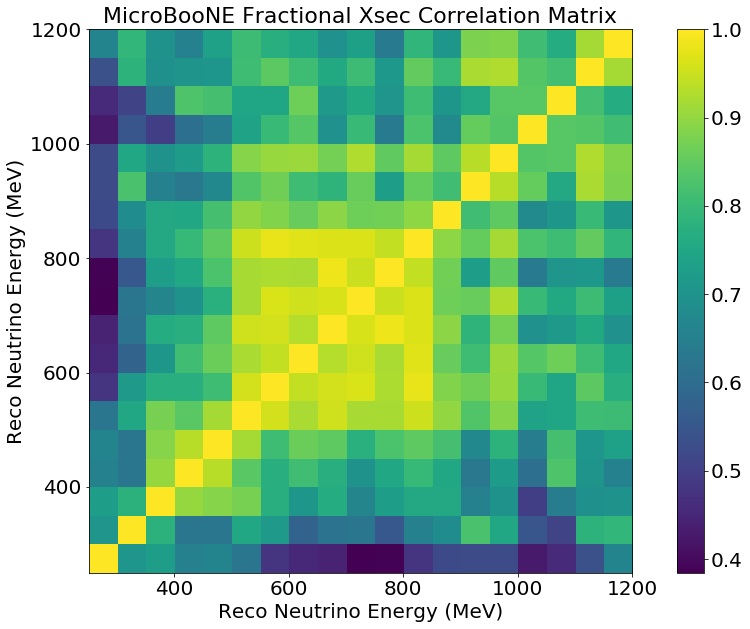

In [29]:
fig,ax = plt.subplots(figsize=(16,10))

ax.set_title('MicroBooNE Fractional Xsec Correlation Matrix',fontsize=22)
plt.imshow(nmat_xsec_corr,extent=[250,1200,250,1200],origin='lower')
ax.set_ylabel('Reco Neutrino Energy (MeV)',fontsize=20)
ax.set_xlabel('Reco Neutrino Energy (MeV)',fontsize=20)


plt.colorbar()

In [13]:
var1 = 'Enu_1m1p'
s_tag = 'noxsec'

s_detsysfolder = '/home/dcianci/Physics/1e1p/data/DetsysCovMatrices/covMatrixForDavio2021-02-24'
s_detsyscov_run1 = '%s/%s/detsys_%s_run1_cov.csv'%(s_detsysfolder,var1,var1)
s_detsyscov_run3 = '%s/%s/detsys_%s_run1_cov.csv'%(s_detsysfolder,var1,var1)
detsyscov_run1 = np.genfromtxt(s_detsyscov_run1,delimiter=',')
detsyscov_run3 = np.genfromtxt(s_detsyscov_run3,delimiter=',')
detsyscov = detsyscov_run1*(RUN1_FILTER_POT/float(RUN1_FILTER_POT+RUN2_FILTER_POT+RUN3_FILTER_POT)) + detsyscov_run3*((RUN2_FILTER_POT+RUN3_FILTER_POT)/float(RUN1_FILTER_POT+RUN2_FILTER_POT+RUN3_FILTER_POT))
allsyscov = np.nan_to_num(np.genfromtxt(varListSel[var1].myscov,delimiter=','))
syscov = allsyscov[1:,1:] + detsyscov[1:,1:] - nmat_flux
print(np.shape(syscov))

np.savetxt('/home/dcianci/Downloads/%s_%s_fracsysmatrix.txt'%(var1,s_tag),syscov,delimiter=" ")

(19, 19)


# Osc Output

In [48]:
var1 = 'Enu_1m1p'
s_tag = 'apr22_bigbins'
nBins1 = 4

printvars = [var1,'MC_energyInit','nu_L_true','potscale','fullwgt']
df_mc[printvars].to_csv('/home/dcianci/Downloads/%s_%s_MC.txt'%(var1,s_tag),index=False,header=False,sep='\t')

df_data = pd.concat((df_data_run1_filter_presel,df_data_run2_filter_presel,df_data_run3_filter_presel)).query(s_cuts)
df_bkg = pd.concat((df_ext_run1_presel,df_ext_run3_presel)).query(s_cuts)

data_vals,binedges1 = np.histogram(df_data[var1],bins=nBins1,range=varListSel[var1].myrange)
np.savetxt('/home/dcianci/Downloads/%s_%s_data.txt'%(var1,s_tag), data_vals, delimiter=" ")
np.savetxt('/home/dcianci/Downloads/%s_%s_binedges.txt'%(var1,s_tag), binedges1, delimiter=" ")

bkg_vals,_ = np.histogram(df_bkg[var1],bins=nBins1,range=varListSel[var1].myrange,weights=df_bkg['potscale'])
np.savetxt('/home/dcianci/Downloads/%s_%s_bkg.txt'%(var1,s_tag),bkg_vals,delimiter=" ")


# s_detsysfolder = '/home/dcianci/Physics/1e1p/data/DetsysCovMatrices/covMatrixForDavio2021-02-24'
# s_detsyscov_run1 = '%s/%s/detsys_%s_run1_cov.csv'%(s_detsysfolder,var1,var1)
# s_detsyscov_run3 = '%s/%s/detsys_%s_run1_cov.csv'%(s_detsysfolder,var1,var1)
# detsyscov_run1 = np.genfromtxt(s_detsyscov_run1,delimiter=',')
# detsyscov_run3 = np.genfromtxt(s_detsyscov_run3,delimiter=',')
# detsyscov = detsyscov_run1*(RUN1_FILTER_POT/float(RUN1_FILTER_POT+RUN2_FILTER_POT+RUN3_FILTER_POT)) + detsyscov_run3*((RUN2_FILTER_POT+RUN3_FILTER_POT)/float(RUN1_FILTER_POT+RUN2_FILTER_POT+RUN3_FILTER_POT))
# syscov =  np.nan_to_num(np.genfromtxt(varListSel[var1].myscov,delimiter=',')) + detsyscov

# np.savetxt('/home/dcianci/Downloads/%s_%s_fracsysmatrix.txt'%(var1,s_tag),syscov[1:,1:],delimiter=" ")

In [47]:
binedges1

array([ 200.,  450.,  700.,  950., 1200.], dtype=float32)

## 2D OSC OUTPUT

In [13]:
var1 = 'Muon_Edep'
var2 = 'Lepton_CosTheta'
s_tag = 'apr21'
nBins1 = 5
nBins2 = 12

printvars = [var1,var2,'MC_energyInit','nu_L_true','potscale','fullwgt']
df_mc[printvars].to_csv('/home/dcianci/Downloads/%s_%s_%s_MC.txt'%(var1,var2,s_tag),index=False,header=False,sep='\t')

df_data = pd.concat((df_data_run1_filter_presel,df_data_run2_filter_presel,df_data_run3_filter_presel)).query(s_cuts)
df_bkg = pd.concat((df_ext_run1_presel,df_ext_run3_presel)).query(s_cuts)

data_vals,binedges1,binedges2 = np.histogram2d(df_data[var1],df_data[var2],range=(varListSel[var1].myrange,varListSel[var2].myrange),bins=(nBins1,nBins2))
np.savetxt('/home/dcianci/Downloads/%s_%s_%s_data.txt'%(var1,var2,s_tag), data_vals.flatten(), delimiter=" ")
np.savetxt('/home/dcianci/Downloads/%s_%s_binedges.txt'%(var1,s_tag), binedges1, delimiter=" ")
np.savetxt('/home/dcianci/Downloads/%s_%s_binedges.txt'%(var2,s_tag), binedges2, delimiter=" ")

bkg_vals,_,_ = np.histogram2d(df_bkg[var1],df_bkg[var2],range=(varListSel[var1].myrange,varListSel[var2].myrange),bins=(nBins1,nBins2),weights=df_bkg['potscale'])
np.savetxt('/home/dcianci/Downloads/%s_%s_%s_bkg.txt'%(var1,var2,s_tag),bkg_vals.flatten(),delimiter=" ")

mc 2936.254379076712
data 3801.0
[-1.         -0.83333333 -0.66666667 -0.5        -0.33333333 -0.16666667
  0.          0.16666667  0.33333333  0.5         0.66666667  0.83333333
  1.        ]


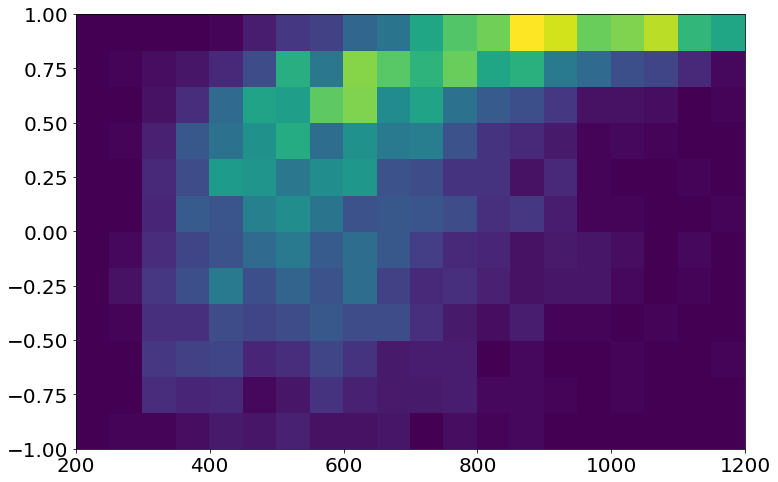

In [37]:
fig,ax = plt.subplots(figsize=(12,8))

_1= plt.hist2d(df_mc[var1],df_mc[var2],range=(varListSel[var1].myrange,varListSel[var2].myrange),bins=(nBins1,nBins2),weights=df_mc['potscale'])
_2 = plt.hist2d(df_data[var1],df_data[var2],range=(varListSel[var1].myrange,varListSel[var2].myrange),bins=(nBins1,nBins2))
# plt.colorbar(label='Event Count')
# ax.set_xlabel(var1,fontsize=30)
# ax.set_ylabel(var2,fontsize=30)

# print(data_vals.flatten().sum())

print('mc',_1[0].flatten().sum())
print('data',_2[0].flatten().sum())

print(_1[2].flatten())

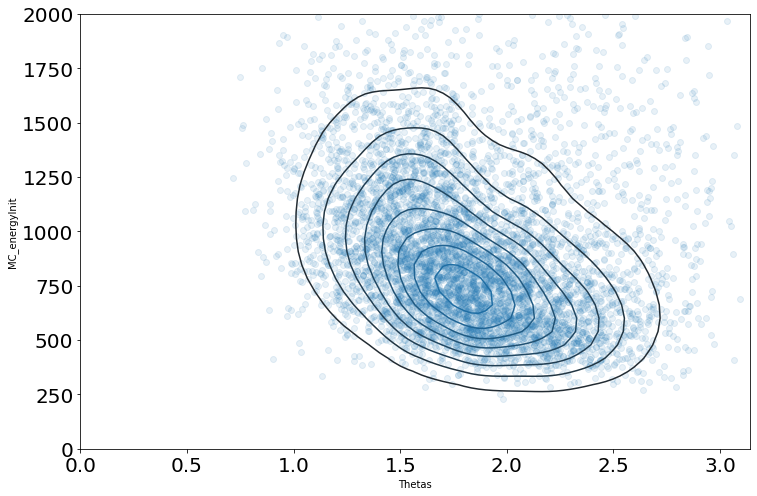

In [44]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_xlim(0,np.pi)
ax.set_ylim(0,2000)
sns.kdeplot(df_mc['Thetas'],df_mc['MC_energyInit'])
plt.scatter(df_mc['Thetas'],df_mc['MC_energyInit'],alpha=.1)

In [118]:
_2[0].flatten()

array([  5.,  21.,  34.,  61., 117., 166., 216., 258., 302., 372., 281.,
        85.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   5.,  15.,  82.,
       290., 385.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         2.,  41., 337.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 150.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,  35.])

In [119]:
np.array((41, 77, 110, 143, 176, 149, 143, 139, 102, 60, 18, 1, 1, 6, 14, 35, 65, 103, 152, 183, 237, 300, 221, 70, 0, 0, 0, 0, 0, 2, 2,11, 28, 108, 271, 219, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 103, 314, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 224)).sum()

3849

## Zeta

In [39]:
var1 = 'Enu_1m1p'
s_tag = 'apr16_bigbin'
nBins1 = 5

bdtcuts = 'bkgBDT_univ < .4'
emptycut = 'Enu_1m1p > 0'
morecuts = 'Proton_CosTheta > 0'
bonuscuts = '(MPID_proton > .9 or Enu_1m1p > 400)'
s_cuts = morecuts + ' and ' + bonuscuts + ' and ' + bdtcuts

# print ntuples for an oscillation study
#df_data_run1_presel.query(s_cuts)[printvars].to_csv('~/Downloads/dataSelected_RSEVE_run1_5e19_%s.csv'%tag,index=False,header=False)
df_numu_run1_presel['potscale'] = RUN1_FILTER_POT/float(NUMU_RUN1_POT)
df_numu_run2_presel['potscale'] = RUN2_FILTER_POT/float(NUMU_RUN2_POT)
df_numu_run3_presel['potscale'] = RUN3_FILTER_POT/float(NUMU_RUN3_POT)
df_nue_run1_presel['potscale'] = RUN1_FILTER_POT/float(NUE_RUN1_POT)
df_nue_run2_presel['potscale'] = RUN2_FILTER_POT/float(NUE_RUN2_POT)
df_nue_run3_presel['potscale'] = RUN3_FILTER_POT/float(NUE_RUN3_POT)

/home/dcianci/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """
/home/dcianci/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice.


0.10752024992215257


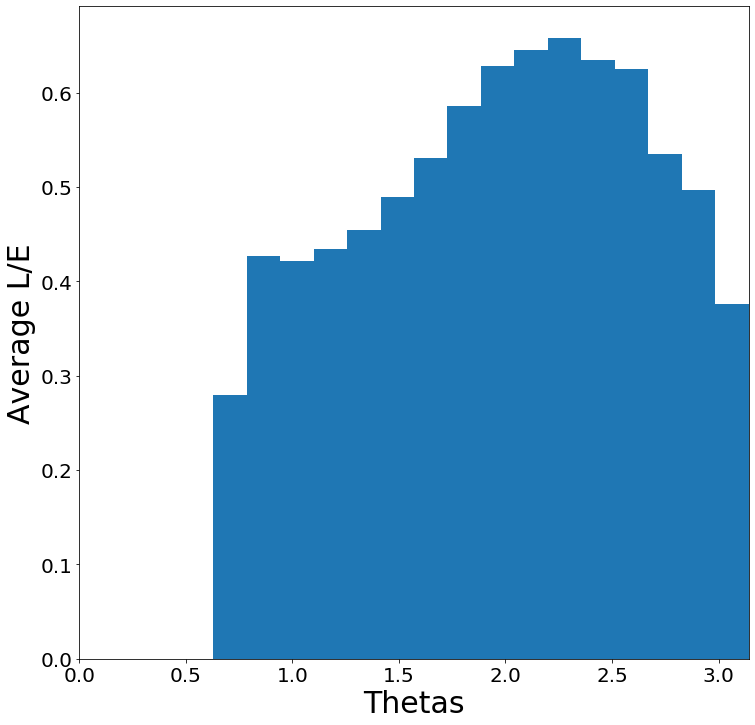

In [146]:
nbins = 20
myrange = (0,np.pi)
myvar = 'Thetas'

df_mc = pd.concat((df_numu_run1_presel,df_numu_run2_presel,df_numu_run3_presel,df_nue_run1_presel,df_nue_run2_presel,df_nue_run3_presel)).query(s_cuts)
df_mc['fullwgt'] = Pi0Wgt(df_mc)
df_mc['lovere'] = np.divide(df_mc['nu_L_true'].values,df_mc['nu_energy_true'])


binedges = np.linspace(myrange[0],myrange[-1],nbins+1)
bincenters = binedges[:-1] + np.diff(binedges)/2.0

zeta = np.zeros(nbins)
zbinz = np.digitize(df_mc[myvar],binedges)
df_mc['zbinz'] = zbinz-1


for i in range(nbins):
    zeta[i] = df_mc.query('zbinz==%i'%i)['lovere'].values.mean()
    
    
fig,ax = plt.subplots(figsize=(12,12))

_ = plt.hist(bincenters,range=myrange,bins=nbins,weights=zeta)
ax.set_xlim(myrange)
ax.set_xlabel(myvar,fontsize=30)
ax.set_ylabel('Average L/E',fontsize=30)

print(zeta[zeta==zeta].std())

{'Xreco': <PlottingScripts.distVar at 0x7f6dc5727860>,
 'Yreco': <PlottingScripts.distVar at 0x7f6dc5727898>,
 'Zreco': <PlottingScripts.distVar at 0x7f6dc5727978>,
 'OpenAng': <PlottingScripts.distVar at 0x7f6dc57279b0>,
 'Thetas': <PlottingScripts.distVar at 0x7f6dc57279e8>,
 'Phis': <PlottingScripts.distVar at 0x7f6dc5727a20>,
 'ChargeNearTrunk': <PlottingScripts.distVar at 0x7f6dc5727a58>,
 'Enu_1m1p': <PlottingScripts.distVar at 0x7f6dc5727a90>,
 'PhiT_1m1p': <PlottingScripts.distVar at 0x7f6dc5727ac8>,
 'AlphaT_1m1p': <PlottingScripts.distVar at 0x7f6dc5727b00>,
 'PT_1m1p': <PlottingScripts.distVar at 0x7f6dc5727b38>,
 'PTRat_1m1p': <PlottingScripts.distVar at 0x7f6dc5727b70>,
 'BjXB_1m1p': <PlottingScripts.distVar at 0x7f6dc5727ba8>,
 'BjYB_1m1p': <PlottingScripts.distVar at 0x7f6dc5727be0>,
 'Q2_1m1p': <PlottingScripts.distVar at 0x7f6dc5727c18>,
 'SphB_1m1p': <PlottingScripts.distVar at 0x7f6dc5727c50>,
 'Q0_1m1p': <PlottingScripts.distVar at 0x7f6dc5727c88>,
 'Q3_1m1p': <Plot

In [53]:
nbins = 14
dumphole = '/home/dcianci/Desktop/zetaplots' # where are we dumping these?
if not os.path.exists(dumphole):
    os.makedirs(dumphole)


for x,dvar in varListSel.items():

    myrange = dvar.myrange
    myvar = dvar.myname

    binedges = np.linspace(myrange[0],myrange[-1],nbins+1)
    bincenters = binedges[:-1] + np.diff(binedges)/2.0

    zeta = np.zeros(nbins)
    zbinz = np.digitize(df_mc[myvar],binedges)

    df_mc['zbinz'] = zbinz-1
    df_mc['lovere'] = np.divide(df_mc['nu_L_true'].values,df_mc['nu_energy_true'])

    for i in range(nbins):
        zeta[i] = df_mc.query('zbinz==%i'%i)['lovere'].values.mean()
    
        
    fig,ax = plt.subplots(figsize=(12,12))
    
    _ = plt.hist(bincenters,range=myrange,bins=nbins,weights=zeta)
    ax.set_xlim(myrange)
    ax.set_xlabel(myvar,fontsize=30)
    ax.set_ylabel('Average L/E',fontsize=30)
    
    plt.savefig(dumphole+'/'+myvar+'_zeta.png')
    plt.close(fig)
        

/home/dcianci/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice.
/home/dcianci/.local/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Same shit but 2d

/home/dcianci/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
/home/dcianci/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice.
/home/dcianci/.local/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.11719705081258348


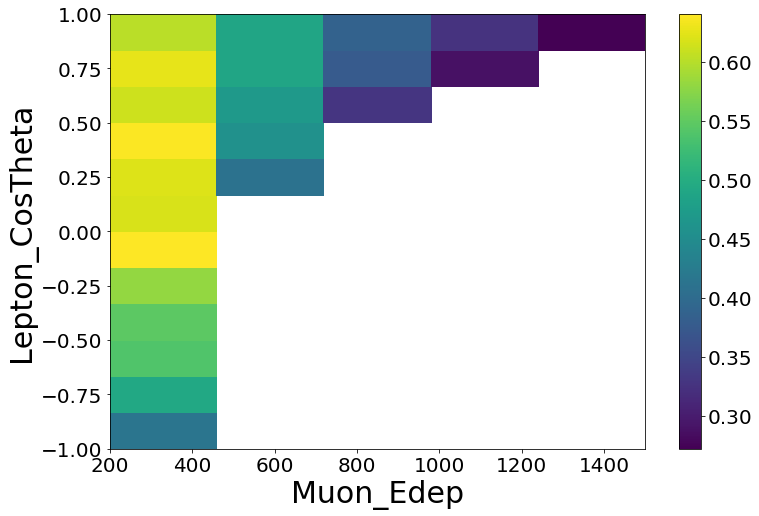

In [122]:
nbins1 = 5
myrange1 = (200,1500)
myvar1 = 'Enu_1m1p'
nbins2 = 12
myrange2 = (-1,1)
myvar2 = 'Thetas'

df_mc = pd.concat((df_numu_run1_presel,df_numu_run2_presel,df_numu_run3_presel,df_nue_run1_presel,df_nue_run2_presel,df_nue_run3_presel)).query(s_cuts)
df_mc['fullwgt'] = Pi0Wgt(df_mc)
df_mc['lovere'] = np.divide(df_mc['nu_L_true'].values,df_mc['nu_energy_true'])

binedges1 = np.linspace(myrange1[0],myrange1[-1],nbins1+1)
bincenters1 = binedges1[:-1] + np.diff(binedges1)/2.0
binedges2 = np.linspace(myrange2[0],myrange2[-1],nbins2+1)
bincenters2 = binedges2[:-1] + np.diff(binedges2)/2.0
bincentersx = np.zeros((nbins1,nbins2))
bincentersy = np.zeros((nbins1,nbins2))

zbinz1 = np.digitize(df_mc[myvar1],binedges1)
zbinz2 = np.digitize(df_mc[myvar2],binedges2)

df_mc['zbinz1'] = zbinz1-1
df_mc['zbinz2'] = zbinz2-1

zeta = np.zeros((nbins1,nbins2))
for i in range(nbins1):
    for j in range(nbins2):
        zeta[i][j] = df_mc.query('zbinz1==%i and zbinz2==%i'%(i,j))['lovere'].values.mean()
        bincentersx[i][j] = bincenters1[i]
        bincentersy[i][j] = bincenters2[j]    

fig,ax = plt.subplots(figsize=(12,8))

_ = plt.hist2d(bincentersx.flatten(),bincentersy.flatten(),range=(myrange1,myrange2),bins=(nbins1,nbins2),weights=zeta.flatten())
ax.set_xlim(myrange1)
ax.set_ylim(myrange2)
ax.set_xlabel(myvar1,fontsize=30)
ax.set_ylabel(myvar2,fontsize=30)

plt.colorbar()

print(zeta[zeta==zeta].std())

mc 5812.59306313197
data 3261.0


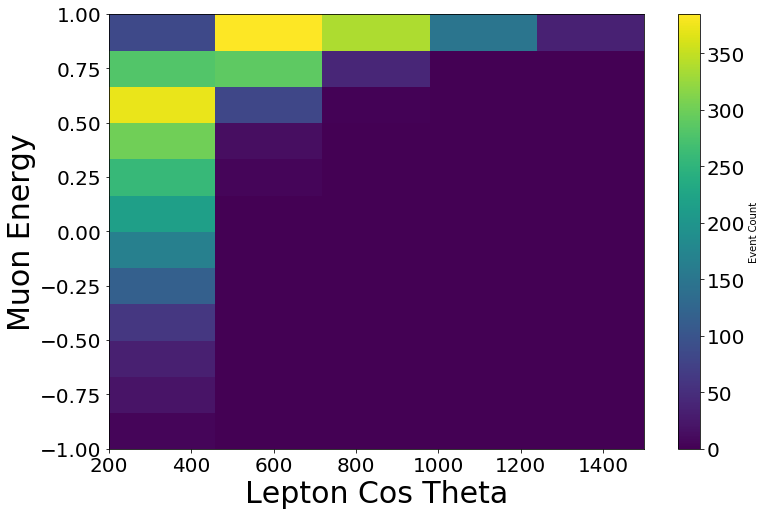

In [123]:
fig,ax = plt.subplots(figsize=(12,8))

_1= plt.hist2d(df_mc[myvar1],df_mc[myvar2],range=(myrange1,myrange2),bins=(nbins1,nbins2),weights=df_mc['fullwgt'])
_2 = plt.hist2d(df_data[myvar1],df_data[myvar2],range=(myrange1,myrange2),bins=(nbins1,nbins2))
plt.colorbar(label='Event Count')
ax.set_xlabel('Lepton Cos Theta',fontsize=30)
ax.set_ylabel('Muon Energy',fontsize=30)

print('mc',_1[0].flatten().sum())
print('data',_2[0].flatten().sum())

5812.59306313197

3261.0

In [70]:
myrange1 = (-1,1)
myvar1 = 'Lepton_CosTheta'
myrange2 = (200,1500)
myvar2 = 'Muon_Edep'

df_mc = pd.concat((df_numu_run1_presel,df_numu_run2_presel,df_numu_run3_presel,df_nue_run1_presel,df_nue_run2_presel,df_nue_run3_presel)).query(s_cuts)
df_mc['fullwgt'] = Pi0Wgt(df_mc)
df_mc['lovere'] = np.divide(df_mc['nu_L_true'].values,df_mc['nu_energy_true'])

var1range = 20
var2range = 20
stdevs = np.zeros((var1range,var2range))

for testi in range(1,var1range):
    for testj in range(1,var2range):
        
        nbins1 = testi
        nbins2 = testj
        
        binedges1 = np.linspace(myrange1[0],myrange1[-1],nbins1+1)
        bincenters1 = binedges1[:-1] + np.diff(binedges1)/2.0
        binedges2 = np.linspace(myrange2[0],myrange2[-1],nbins2+1)
        bincenters2 = binedges2[:-1] + np.diff(binedges2)/2.0
        bincentersx = np.zeros((nbins1,nbins2))
        bincentersy = np.zeros((nbins1,nbins2))

        zbinz1 = np.digitize(df_mc[myvar1],binedges1)
        zbinz2 = np.digitize(df_mc[myvar2],binedges2)

        df_mc['zbinz1'] = zbinz1-1
        df_mc['zbinz2'] = zbinz2-1

        zeta = np.zeros((nbins1,nbins2))
        for i in range(nbins1):
            for j in range(nbins2):
                zeta[i][j] = df_mc.query('zbinz1==%i and zbinz2==%i'%(i,j))['lovere'].values.mean()
        
        stdevs[testi][testj] = zeta[zeta==zeta].std()

/home/dcianci/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
/home/dcianci/.local/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice.
/home/dcianci/.local/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


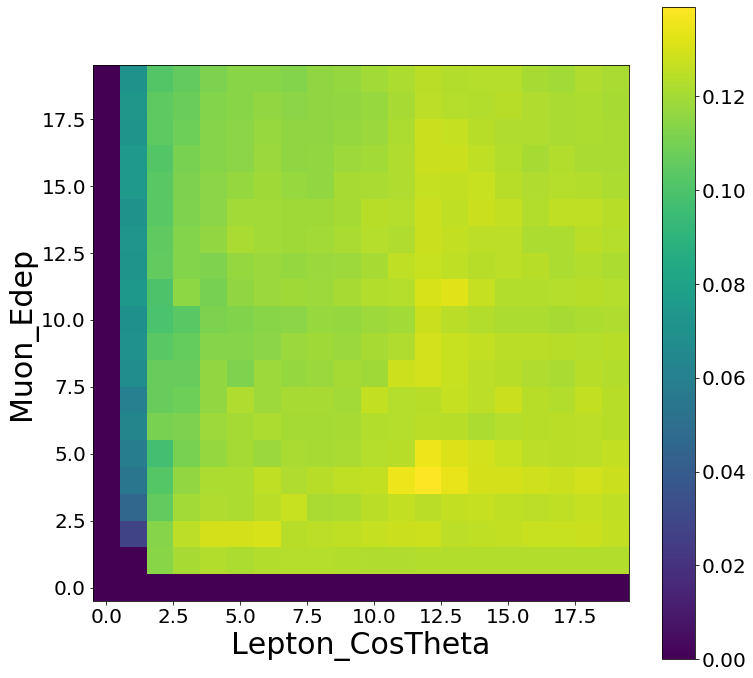

In [73]:
fig,ax = plt.subplots(figsize=(12,12))

plt.imshow(stdevs)
plt.gca().invert_yaxis()


#ax.set_xlim(0,var1range)
#ax.set_ylim(0,var2range)
ax.set_xlabel(myvar1,fontsize=30)
ax.set_ylabel(myvar2,fontsize=30)

plt.colorbar()


In [13]:
from root_numpy import matrix
from ROOT import TMatrixD
import ROOT

f = ROOT.TFile.Open('../data/uboone/DL.SBNcovar.root')
nmat = matrix(f.collapsed_frac_covariance)
nmat.diagonal()

matrix([[0.12387414, 0.04689781, 0.02953433, 0.02758264, 0.02179139,
         0.01657707, 0.01486956, 0.01363077, 0.01417562, 0.01342718,
         0.01394899, 0.01408515, 0.01426614, 0.02052101, 0.01767892,
         0.01687241, 0.02314564, 0.02084852, 0.02605084]])

In [20]:
syscov = np.nan_to_num(np.genfromtxt(varListSel['Enu_1m1p'].myscov,delimiter=','))
syscov[1:,1:].diagonal()

array([0.12387573, 0.04689083, 0.02953538, 0.0275886 , 0.02179263,
       0.01657585, 0.01487123, 0.01363089, 0.01417603, 0.01342807,
       0.0139481 , 0.01408698, 0.01427028, 0.02051948, 0.01767436,
       0.01688284, 0.02314464, 0.02084017, 0.02604124])

In [23]:
(syscov[1:,1:]-nmat).max()

1.0422639567735092e-05

In [32]:
sbnfit = np.asarray((0.153859, 0.0634444, 0.037552, 0.0369467, 0.0288248, 0.0227845, 0.0220885, 0.0223819, 0.0210695, 0.020384, 0.0208293, 0.0200588, 0.021055, 0.0271483, 0.0283371, 0.0352438, 0.0476235, 0.0528934, 0.0587463))

In [35]:
syscov = np.nan_to_num(np.genfromtxt('../data/uboone/Enu_1m1p_apr22_fracsysmatrix.txt'))
print(syscov.diagonal())
print(sbnfit)
print(syscov.diagonal()-sbnfit)

[0.15386101 0.05978173 0.03682356 0.03439426 0.02795759 0.02278323
 0.02181143 0.02093363 0.02106992 0.0193678  0.02008062 0.02006066
 0.01954904 0.02714676 0.02782898 0.03256694 0.04762247 0.05288502
 0.05873671]
[0.153859  0.0634444 0.037552  0.0369467 0.0288248 0.0227845 0.0220885
 0.0223819 0.0210695 0.020384  0.0208293 0.0200588 0.021055  0.0271483
 0.0283371 0.0352438 0.0476235 0.0528934 0.0587463]
[ 2.00632795e-06 -3.66267022e-03 -7.28436742e-04 -2.55243935e-03
 -8.67205739e-04 -1.26847099e-06 -2.77069142e-04 -1.44826537e-03
  4.17060567e-07 -1.01619790e-03 -7.48682331e-04  1.86039511e-06
 -1.50596169e-03 -1.53616490e-06 -5.08120086e-04 -2.67685576e-03
 -1.02576362e-06 -8.37522780e-06 -9.58544077e-06]


In [19]:
localspec = np.asarray((9.01169, 92.2785, 146.565, 240.663, 269.41, 343.899, 364.108, 347.816, 319.225, 282.653, 263.853, 221.32, 205.485, 170.267, 127.866, 91.3127, 69.7602, 68.9559, 60.9471))
remotespec = np.asarray((8.84213, 89.6568, 142.24, 228.386, 259.803, 333.383, 357.245, 335.369, 313.085, 276.376, 256.293, 215.519, 201.934, 169.374, 123.686, 92.7284, 67.8075, 66.9364, 59.5777))


0.053755484136505806

In [40]:
local = np.asarray((21.0308, 602.305, 921.169, 2166.3, 2234.68, 2963.04, 3158.73, 2775.46, 2374.82, 1747.59, 1573.09, 1131.6, 968.003, 911.319, 554.986, 326.239, 277.156, 311.868, 260.68))
remote = np.asarray((20.2632, 573.202, 865.053, 1958.62, 2082.32, 2794, 3052.06, 2566.08, 2300.1, 1676.6, 1487.69, 1080.3, 962.065, 922.797, 520.201, 360.372, 263.509,295.442, 249.704))

In [41]:
local-remote

array([  0.7676,  29.103 ,  56.116 , 207.68  , 152.36  , 169.04  ,
       106.67  , 209.38  ,  74.72  ,  70.99  ,  85.4   ,  51.3   ,
         5.938 , -11.478 ,  34.785 , -34.133 ,  13.647 ,  16.426 ,
        10.976 ])